In [2]:
# -*- coding: UTF-8 -*-
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
from lxml import etree
import re
import time
import numpy as np
import pandas as pd
import os
import json
import jieba
from google import google
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer


In [113]:
def get_html(url):
    #模擬訪問頁面的函數
    try:
        user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36'
        resp = requests.get(url, headers={'User-Agent': user_agent}, timeout = 30)#,verify = False) #回傳為一個request.Response的物件
        resp.encoding = 'unicode'
        #resp.endcoding = 'utf8'
        #response = resp.content.decode()
        c = resp.status_code
        return resp.text
    except HTTPError as e:
        print(url)
        print(e)
        return "HTTPError"
    except URLError as e:
        print(url)
        print(e)
        return "URLError"

In [53]:
def get_all_text(url):
    #函數用來爬取google搜尋內容（底下的判斷式專門用來處理痞客邦）
    text = get_html(url)
    html = etree.HTML(text)
    no_use_content = html.xpath('//article//text()')#'//*/text()')
    content = str()
    flag = False #不等於中文字的情況
    count = 0 #想要找出是句中標點的東西，1代表是在句子中
    for i in no_use_content:
        for ch in i:
            if (u'\u4e00' >= ch or ch >= u'\u9fff'):
                count += 1
                flag = False

            if (flag == False and count == 1): #and (ch in '！？｡\＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜'):
                content += ch
                continue
            if not(u'\u4e00' >= ch or ch >= u'\u9fff'):
                count = 0
                flag = True
                content += ch
    content = content.replace('\r', ' ')
    content = content.replace('\t', ' ')
    content = content.replace('\n', ' ')
    #底下用來處理痞客邦
    if content == '':
        no_use_content = html.xpath('//*[@id="article-box"]/div//text()')
        content = str()
        flag = False #不等於中文字的情況
        count = 0 #想要找出是句中標點的東西，1代表是在句子中
        for i in no_use_content:
            for ch in i:
                if (u'\u4e00' >= ch or ch >= u'\u9fff'):
                    count += 1
                    flag = False

                if (flag == False and count == 1): #and (ch in '！？｡\＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜'):
                    content += ch
                    continue
                if not(u'\u4e00' >= ch or ch >= u'\u9fff'):
                    count = 0
                    flag = True
                    content += ch
        content = content.replace('\r', ' ')
        content = content.replace('\t', ' ')
        content = content.replace('\n', ' ')
    return content #no_use_content


In [24]:
def get_google(keyword, num_page):
    #函數接google api返回搜尋結果
    search_results = google.search(str(keyword), num_page)
    return search_results

In [119]:
def get_mobile_forum_links(url):
    bs = BeautifulSoup(get_html(url), 'html.parser')
    print(bs)
    links = []
    for i in bs.find_all('a', {'class':'gs-title'}):   
        #link = i.find('a').attrs['href']
        link = i.attrs['href']
        links.append(link)
    return links

In [120]:
urls = get_mobile_forum_links('https://www.mobile01.com/googlesearch.php?q=%E8%B2%93%E7%A0%82+%E6%8E%A8%E8%96%A6&siteurl=www.mobile01.com%2Ftopiclist.php%3Ff%3D290%26fbclid%3DIwAR15ElbWJGtuluWujLQqKVRNcwXlHZbA61p9FAhINP0dWI7sdr_g6WmJiu0&ref=l.facebook.com%2F&ss=1791j261103j17')
urls



<!DOCTYPE html>

<html lang="zh-TW">
<head>
<meta charset="utf-8"/>
<meta content="width=1000" name="viewport"/>
<meta content="「全球華人最注目的社群網站是哪個？」這問題的答案非常簡單，就是Mobile01！" name="description"/>
<meta content="zh_TW" property="og:locale"/>
<meta content="Google 站內搜尋 - Mobile01" property="og:title"/>
<meta content="「全球華人最注目的社群網站是哪個？」這問題的答案非常簡單，就是Mobile01！" property="og:description"/>
<meta content="https://attach2.mobile01.com/images/mobile01-default.jpg" property="og:image"/>
<meta content="800" property="og:image:width"/>
<meta content="533" property="og:image:height"/>
<meta content="100000081762620" property="fb:admins"/>
<meta content="1548610928687358" property="fb:app_id"/>
<meta content="100000081762620" property="fb:admins"/>
<meta content="1548610928687358" property="fb:app_id"/>
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<title>Google 站內搜尋 - Mobile01</title>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//www.googletagservices.com" rel="dns-pre

[]

In [63]:
#執行爬蟲，並寫入檔案
keyword = "貓砂 評價"
num_page = 10
urls = get_google(keyword, num_page)
urls_list = []
for i in urls:
    urls_list.append(str(i.link))
#print(urls_list)
w1 = open("貓砂_評價_10頁_1","w")
for i in urls_list:
    test = get_all_text(i)
    w1.write(test)
    w1.write('\n')
    w1.write('----------------')
    w1.write('\n')
w1.close()






/Users/rikeion/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/rikeion/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/rikeion/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/rikeion/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847

/Users/rikeion/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/rikeion/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/rikeion/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/rikeion/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847

/Users/rikeion/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/rikeion/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/rikeion/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/rikeion/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847

In [3]:
#讀檔簡單清理
with open("貓砂_評價_10頁_1","r") as r1:
    all_article = r1.read()
#把文字變成list
all_article = all_article.split("\n")
while '----------------' in all_article:
    all_article.remove('----------------')
while '' in all_article:
    all_article.remove('')
print(all_article)
len(all_article)


[' 推薦十大貓砂人氣排行榜【年最新版】貓砂是讓各位貓皇們舒適生活的必備用品之一除了選擇讓貓咪使用起來舒適的商品外，飼主們也大多會考量到使用後是否好處理等問題而市面上包含加拿大晶鑽、等品牌都有推出貓砂，材料上更有木屑砂紙砂、水晶砂豆腐砂及礦物砂之分，究竟要如何選購呢今天我們整理了幾項選購重點提供給大家做參考。另外還會以排行榜的形式介紹十款值得推薦的人氣商品。選對貓砂不但更方便清理也能改善屋內氣味，相信貓咪們也會很開心哦目次 貓砂的選購要點 什麼樣的貓砂能讓貓咪在使用時感到舒適對飼主來說也方便整理呢？本段將分別針對消臭清理、價格材質等四大要件切入，分析商品的優缺點確認是否能夠確實除臭 飼主們在購買貓砂時，最主要的考量想必都是希望能夠除臭吧比起其他的動物，貓的尿液味道特別刺鼻原因在於貓咪的腎臟會分泌一種叫做的蛋白質，這種成分在貓科類動物體內含量特別大也是造成貓尿味道特別難聞的原因。然而不是每個貓奴都有空隨時更換發臭的貓砂，因此最近也有許多標榜可長時間不更換除臭力強的貓砂。在文章後面的人氣排行榜上也會做介紹請大家務必參考看看。不過貓咪是非常愛乾淨的動物貓砂盆太髒挑剔的貓咪們可能會拒絕使用，甚至開始亂尿在其他地方即使該貓砂能夠長時間消除臭味，還是要注意貓砂盆的清潔狀況喔選擇凝固力強，事後好處理的貓砂凝固力不佳的貓砂，不僅難以用貓砂鏟挖起也容易遺漏沾染排泄物的粉塵，較難以維持衛生相信許多飼主們也經常遇到宣稱凝固力強，實際使用後卻發現無法妥善結塊的貓砂吧其實有些貓砂只是需要足夠的時間凝固，因此在貓咪使用完後不要急著清理建議可以稍等幾分鐘之後再將排洩物取出。每款貓砂都有自己的凝固時間，更換新貓砂時可以多觀察凝固狀態以便掌握清理的時機。此外貓撥不到砂或貓砂的量不足都會影響凝固力，所以務必要將貓砂確實鋪滿貓砂盆並且維持適當的厚度，以免貓咪直接尿在盆底上如果已經按照這些方法正確使用，但凝固力卻依然不佳那麼是時候換款更好的貓砂了！衡量商品性價比，控制耗材開銷貓砂是每天都會用到的消耗品，如果選用價格太高的產品長久下來也是不小的開銷。因此建議大家在購買時也要考量機能性使用材料與價格之間的平衡。建議各位優先從貓砂的吸收力來判斷商品的值，吸收力好的貓砂不僅在用量上較小對於飼主們的荷包和地球的環保也更加友善。選擇不同的貓砂材質 目前市面上常見貓砂的材質分為紙砂 礦物砂」木屑砂 豆腐砂 及「水晶砂 

38

In [4]:
data = np.array(all_article)
datadf = pd.DataFrame(data, columns = ['content'])
datadf

,content
0,推薦十大貓砂人氣排行榜【年最新版】貓砂是讓各位貓皇們舒適生活的必備用品之一除了選擇讓貓咪使...
1,松木砂（木屑砂礦砂、豆腐砂紙砂怎麼選？推薦貓砂評比懶人包讓你輕鬆找到最適合的貓砂！礦砂落砂...
2,推薦除臭貓砂超省砂的環保心得日記｜杉木貓砂：好香的木香味貓物貓食貓用品主題文 貓砂盆貓砂 ...
3,貓砂評價。稍微紀錄一下這兩年使用的貓砂以前都是亂買寵物店比較便宜的，也不記得名字了現在因為...
4,#問貓砂 貓砂分享寵物2年1月7日家裡的貓咪都用礦砂，使用過藍鑽 白標、國際貓家 紫標、魔力...
5,我家用過貓砂(礦砂木屑砂/豆腐砂我們家用過的貓砂，大概幾十款吧因為覺得是耗材，所以基本上選...
6,文長！終結落砂惡夢試用九種貓砂配方、多種貓砂盆第一隻貓是後巷整治工程時撿的當時養貓的常識大...
7,寵物／愛貓貓小隊原礦砂／出國七天用原礦砂住整個貓砂盆／粉塵量超低可自然分解臭味的超威猛貓砂...
8,貓砂與砂盆的選擇，如何兼顧貓咪喜好與荷包礦砂 貓砂與砂盆的選擇，如何兼顧貓咪喜好與荷包緒論...
9,貓砂｜好的貓砂讓你上天堂難用的貓砂讓你清不完 補充 年的秋末之際歐肥養了兩隻小貓，如何第次...


In [7]:
#先自定義跟貓砂相關的切詞字典
jieba.load_userdict("/Users/rikeion/Desktop/How I met your mother_text_mining/user_dict.txt")
word_counter = []
word_count_dict = []
#處理廢字、切詞、算詞頻
stop_words = ["，", "。","、","「","」","(",")","？","！","：",",","—","#","（","）","很","都","但","比","的","有","在","與","及","和","是","也","對","了","之","於"," "]
no_use = ['因為','所以','可以','點我','其他','如果','就是','非常']
for i in datadf.iloc[:,0]:
    cut = jieba.cut(i, cut_all = False)
    clean_cut = []
    for j in cut:
        if (j[0] not in stop_words) and (len(j) >= 2) and (j not in no_use):
            clean_cut.append(j)
    word_counter.append(Counter(clean_cut).most_common(20))
for i in range(len(word_counter)):
    dic = dict()
    for j in word_counter[i]:
        dic[j[0]] = j[1]
    word_count_dict.append(dic)
    
    
    

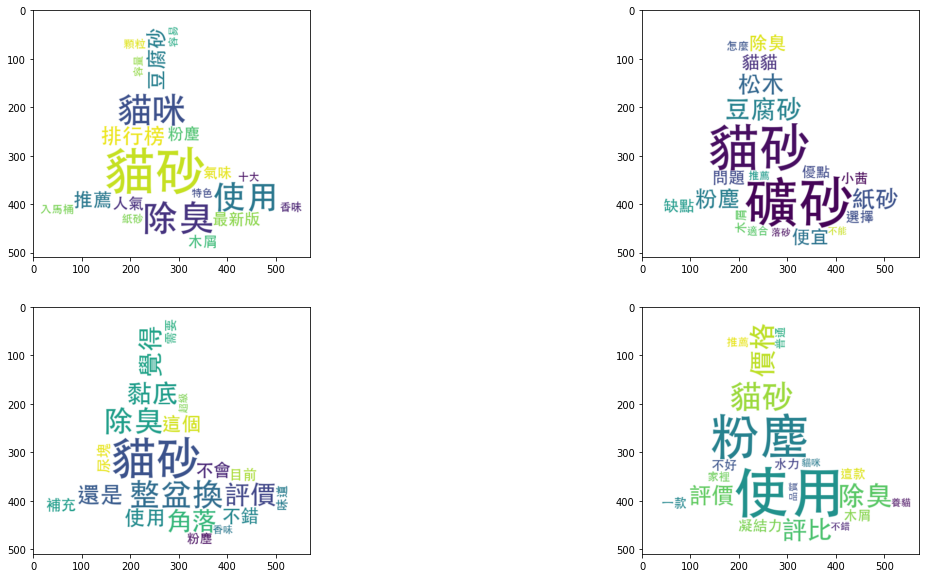

In [8]:
#微軟正黑體
font_path="/System/Library/Fonts/STHeiti Medium.ttc"
#想要文字雲出現的圖示
mask = np.array(Image.open(r"錢錢.jpg"))
location = 0
plt.figure(figsize=(20,10), facecolor='w')
for i in [0,1,3,10]:
    location += 1
    try:
        my_wordcloud = WordCloud(background_color="white",mask=mask,font_path=font_path,collocations=False, width=2400, height=2400, margin=2)  
        my_wordcloud.generate_from_frequencies(word_count_dict[i])

        #產生圖片
        plt.subplot(2,2,location)
        plt.imshow(my_wordcloud,interpolation='bilinear')
        plt.title[datadf['header'][i]]
        plt.tight_layout(pad=0)
        #顯示用
        plt.show()
    except:
        "No content"


In [85]:
#TFIDF
#產出一個稀疏矩陣
corpus = []
for i in datadf.iloc[:,0]:
    cut = jieba.cut(i, cut_all = False)
    clean_cut = []
    for j in cut:
        if j[0] not in no_use:
            clean_cut.append(j) 
    corpus.append(" ".join(clean_cut))

vec = TfidfVectorizer()
tfidf_data = vec.fit_transform(corpus)
matrix = pd.DataFrame(tfidf_data.toarray(), columns = vec.get_feature_names())

matrix.T

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
一下,0.000000,0.000000,0.000000,0.020202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.016539,0.013843,0.035462
一下下,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
一下子,0.000000,0.000000,0.015744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032223,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
一些,0.000000,0.000000,0.025908,0.000000,0.000000,0.024733,0.000000,0.000000,0.000000,0.017676,...,0.027135,0.032400,0.0,0.0,0.0,0.0,0.034251,0.015975,0.000000,0.034254
一位,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022799,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
一便,0.000000,0.000000,0.017534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
一個,0.006297,0.000000,0.015184,0.000000,0.058361,0.000000,0.032778,0.000000,0.000000,0.015539,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.015055,0.014044,0.000000,0.000000
一兩個,0.000000,0.000000,0.000000,0.000000,0.000000,0.025108,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
一共,0.000000,0.038902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
一分,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032223,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.029123,0.000000,0.000000


In [86]:
#對第一個文本（正面講反洗錢的文本）選出TFIDF值大於0.1的詞
matrix = matrix.T
mask1 = matrix.iloc[:,0] >= 0.1
matrix[mask1]

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
中心,0.116353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
入馬桶,0.174530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
其他,0.103903,0.000000,0.000000,0.000000,0.064195,0.000000,0.018027,0.000000,0.040505,0.034185,...,0.000000,0.000000,0.019359,0.00000,0.000000,0.000000,0.033121,0.000000,0.000000,0.0
凝固,0.145442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
十大,0.159986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
容量,0.159986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
排行榜,0.276339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
最新版,0.218162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
氣味,0.134252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.042380,0.000000,0.000000,0.00000,0.000000,0.000000,0.026747,0.000000,0.000000,0.0
特色,0.109506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024565,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [90]:
#對第二個文本（正面講反洗錢的文本）選出TFIDF值大於0.1的詞
matrix = matrix.T
mask1 = matrix.iloc[:,1] >= 0.1
matrix[mask1]

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
便宜,0.000000,0.123261,0.000000,0.031383,0.026692,0.059666,0.000000,0.009030,0.033683,0.000000,...,0.000000,0.000000,0.016098,0.00000,0.000000,0.000000,0.000000,0.025692,0.010752,0.0
優點,0.015375,0.102811,0.027804,0.000000,0.000000,0.013271,0.000000,0.000000,0.000000,0.056908,...,0.029121,0.000000,0.085937,0.00000,0.000000,0.000000,0.073515,0.000000,0.000000,0.0
元免,0.000000,0.116707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
公升,0.000000,0.139718,0.000000,0.000000,0.000000,0.022544,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
問題,0.031487,0.117908,0.068328,0.000000,0.029180,0.119586,0.000000,0.029614,0.018412,0.000000,...,0.023855,0.000000,0.000000,0.00000,0.000000,0.000000,0.165608,0.014044,0.000000,0.0
小茜,0.000000,0.149622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082818,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.714094,0.000000,0.000000,0.000000,0.0
懶人包,0.000000,0.116707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
挑選,0.000000,0.119698,0.000000,0.000000,0.000000,0.000000,0.000000,0.017537,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.053493,0.000000,0.000000,0.0
整理,0.021040,0.112552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.015987,0.025150,0.000000,0.000000,0.0
松木,0.062342,0.240862,0.300633,0.000000,0.000000,0.000000,0.252382,0.000000,0.020252,0.000000,...,0.000000,0.093992,0.000000,0.00000,0.000000,0.094743,0.000000,0.046343,0.000000,0.0


In [94]:
#對第三個文本（正面講反洗錢的文本）選出TFIDF值大於0.1的詞
matrix = matrix.T
mask1 = matrix.iloc[:,3] >= 0.1
matrix[mask1]

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
塑膠袋,0.000000,0.000000,0.000000,0.106720,0.000000,0.000000,0.000000,0.000000,0.000000,0.032223,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
小球,0.000000,0.000000,0.000000,0.106720,0.000000,0.067633,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
尿塊,0.000000,0.000000,0.000000,0.135592,0.000000,0.000000,0.000000,0.031210,0.000000,0.000000,...,0.113133,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
尿酸,0.000000,0.000000,0.000000,0.158477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
工作,0.000000,0.000000,0.026975,0.121904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
整盆換,0.010520,0.000000,0.000000,0.257909,0.000000,0.018161,0.000000,0.000000,0.000000,0.000000,...,0.039850,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
沙塵,0.000000,0.000000,0.000000,0.106720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
補充,0.000000,0.000000,0.000000,0.143283,0.000000,0.000000,0.027378,0.000000,0.030757,0.077874,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
角落,0.000000,0.000000,0.000000,0.196215,0.000000,0.000000,0.062487,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
評價,0.000000,0.017374,0.015662,0.106164,0.180589,0.000000,0.000000,0.000000,0.018991,0.080139,...,0.024605,0.029379,0.000000,0.00000,0.000000,0.078970,0.00000,0.000000,0.024249,0.0


In [96]:
#對第五個文本（正面講反洗錢的文本）選出TFIDF值大於0.1的詞
matrix = matrix.T
mask1 = matrix.iloc[:,4] >= 0.1
matrix[mask1]

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
三個,0.000000,0.000000,0.000000,0.000000,0.111257,0.000000,0.000000,0.000000,0.000000,0.029623,...,0.000000,0.000000,0.033550,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
丟了,0.000000,0.000000,0.015744,0.000000,0.121023,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
價格,0.047446,0.047590,0.000000,0.000000,0.247334,0.000000,0.000000,0.009297,0.000000,0.029269,...,0.000000,0.026825,0.000000,0.00000,0.000000,0.000000,0.028358,0.013226,0.022141,0.0
凝結力,0.010883,0.014555,0.000000,0.044470,0.176505,0.112729,0.000000,0.000000,0.000000,0.067137,...,0.041227,0.024613,0.091246,0.00000,0.042632,0.000000,0.000000,0.024271,0.000000,0.0
博識貓,0.000000,0.000000,0.000000,0.000000,0.202182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
只是,0.006927,0.018528,0.000000,0.018869,0.160487,0.000000,0.000000,0.010858,0.020252,0.017092,...,0.000000,0.000000,0.000000,0.00000,0.027134,0.000000,0.000000,0.000000,0.000000,0.0
帶點,0.000000,0.000000,0.000000,0.000000,0.134788,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
星等,0.000000,0.000000,0.000000,0.000000,0.134788,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
標榜,0.000000,0.000000,0.000000,0.000000,0.103681,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
每磅,0.000000,0.000000,0.000000,0.000000,0.336969,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [98]:
#對第五個文本（正面講反洗錢的文本）選出TFIDF值大於0.1的詞
matrix = matrix.T
mask1 = matrix.iloc[:,5] >= 0.1
matrix[mask1]

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
不錯,0.000000,0.000000,0.000000,0.083213,0.028310,0.137112,0.000000,0.000000,0.000000,0.015075,...,0.023143,0.055267,0.051222,0.00000,0.000000,0.000000,0.000000,0.027250,0.000000,0.0
凝結力,0.010883,0.014555,0.000000,0.044470,0.176505,0.112729,0.000000,0.000000,0.000000,0.067137,...,0.041227,0.024613,0.091246,0.00000,0.042632,0.000000,0.000000,0.024271,0.000000,0.0
凝結度,0.000000,0.000000,0.000000,0.000000,0.000000,0.175758,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
味道,0.025051,0.000000,0.054361,0.054592,0.000000,0.112441,0.039117,0.007854,0.029297,0.148353,...,0.000000,0.022661,0.042006,0.00000,0.019626,0.030456,0.011978,0.033520,0.000000,0.0
問題,0.031487,0.117908,0.068328,0.000000,0.029180,0.119586,0.000000,0.029614,0.018412,0.000000,...,0.023855,0.000000,0.000000,0.00000,0.000000,0.000000,0.165608,0.014044,0.000000,0.0
基本上,0.000000,0.000000,0.000000,0.025786,0.000000,0.130733,0.000000,0.029677,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
所以,0.004504,0.012047,0.070591,0.085886,0.062612,0.108859,0.023444,0.042362,0.013169,0.033342,...,0.051186,0.040744,0.050350,0.00000,0.000000,0.006845,0.064608,0.020089,0.000000,0.0
效果,0.041515,0.000000,0.014300,0.016156,0.000000,0.112624,0.000000,0.027890,0.000000,0.029269,...,0.022466,0.000000,0.016575,0.00000,0.000000,0.009013,0.014179,0.052905,0.000000,0.0
整體,0.000000,0.000000,0.000000,0.047119,0.000000,0.119444,0.022508,0.013557,0.000000,0.042681,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
普通,0.000000,0.000000,0.000000,0.051572,0.000000,0.212440,0.000000,0.029677,0.000000,0.000000,...,0.035858,0.000000,0.000000,0.00000,0.000000,0.000000,0.022631,0.000000,0.000000,0.0


In [106]:
#對第五個文本（正面講反洗錢的文本）選出TFIDF值大於0.1的詞
matrix = matrix.T
mask1 = matrix.iloc[:,9] >= 0.1
matrix[mask1]

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
以及,0.016599,0.000000,0.020011,0.000000,0.000000,0.071639,0.000000,0.013010,0.000000,0.122875,...,0.000000,0.000000,0.023194,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
公園,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107665,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
加拿大,0.012005,0.000000,0.000000,0.000000,0.000000,0.020725,0.000000,0.000000,0.000000,0.118492,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
口味,0.018932,0.025319,0.000000,0.000000,0.000000,0.016342,0.000000,0.000000,0.000000,0.116789,...,0.000000,0.000000,0.026454,0.00000,0.000000,0.000000,0.000000,0.021110,0.0,0.0
味道,0.025051,0.000000,0.054361,0.054592,0.000000,0.112441,0.039117,0.007854,0.029297,0.148353,...,0.000000,0.022661,0.042006,0.00000,0.019626,0.030456,0.011978,0.033520,0.0,0.0
巧達,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107665,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
德國凱,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143553,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
拉肚子,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161117,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
晶鑽貓,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107665,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
木屑,0.085960,0.076641,0.034544,0.000000,0.000000,0.185495,0.093213,0.000000,0.000000,0.194433,...,0.081406,0.000000,0.000000,0.00000,0.000000,0.000000,0.034251,0.015975,0.0,0.0


In [108]:
#對第五個文本（正面講反洗錢的文本）選出TFIDF值大於0.1的詞
matrix = matrix.T
mask1 = matrix.iloc[:,10] >= 0.1
matrix[mask1]

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
一款,0.000000,0.000000,0.000000,0.020941,0.035622,0.013271,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.034771,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
上款,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
不好,0.000000,0.000000,0.009268,0.020941,0.000000,0.026543,0.020007,0.000000,0.022476,0.000000,...,0.000000,0.000000,0.042968,0.000000,0.000000,0.000000,0.018379,0.000000,0.000000,0.0
使用,0.085501,0.045739,0.030924,0.058228,0.059429,0.081183,0.044504,0.093819,0.037498,0.094940,...,0.145750,0.038673,0.083633,0.051089,0.050239,0.058473,0.040882,0.000000,0.000000,0.0
價格,0.047446,0.047590,0.000000,0.000000,0.247334,0.000000,0.000000,0.009297,0.000000,0.029269,...,0.000000,0.026825,0.000000,0.000000,0.000000,0.000000,0.028358,0.013226,0.022141,0.0
價格貴,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
凝結力,0.010883,0.014555,0.000000,0.044470,0.176505,0.112729,0.000000,0.000000,0.000000,0.067137,...,0.041227,0.024613,0.091246,0.000000,0.042632,0.000000,0.000000,0.024271,0.000000,0.0
品質,0.009466,0.000000,0.000000,0.000000,0.000000,0.032683,0.000000,0.044515,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
普通,0.000000,0.000000,0.000000,0.051572,0.000000,0.212440,0.000000,0.029677,0.000000,0.000000,...,0.035858,0.000000,0.000000,0.000000,0.000000,0.000000,0.022631,0.000000,0.000000,0.0
木屑,0.085960,0.076641,0.034544,0.000000,0.000000,0.185495,0.093213,0.000000,0.000000,0.194433,...,0.081406,0.000000,0.000000,0.000000,0.000000,0.000000,0.034251,0.015975,0.000000,0.0


In [12]:
google?